<a href="https://colab.research.google.com/github/Raushan787/IPR/blob/main/Oil_well_IPR_using_Vogel_Model_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
#Assumption of data
Pr=3500 #psig
Qi=4500 #stb\day
Pwf=2500 #psig


#**Using Constant J Concept**#

In [32]:
#Calculation of productivity index (j)
j=Qi/(Pr-Pwf)
print(j)

4.5


In [33]:
#Generates 40 evenly spaced numbers from Reservoir Pressure(Pr) to 0
p=np.linspace(Pr,0,40)

#Calculation of flowrate
q=[]
for i in p:
  q_cal=j*(Pr-i)
  q.append(q_cal)

#Calculation of maximum flow rate(absolute open flow) when Pwf=0 psig
q_max=j*(Pr-0)
q_max

15750.0

In [34]:
#Converting the list of dictionaries into a dataframe
df=pd.DataFrame({"Pwf":p,
                 "Q":q})
df.head()


,Pwf,Q
0,3500.000000,0.000000
1,3410.256410,403.846154
2,3320.512821,807.692308
3,3230.769231,1211.538462
4,3141.025641,1615.384615


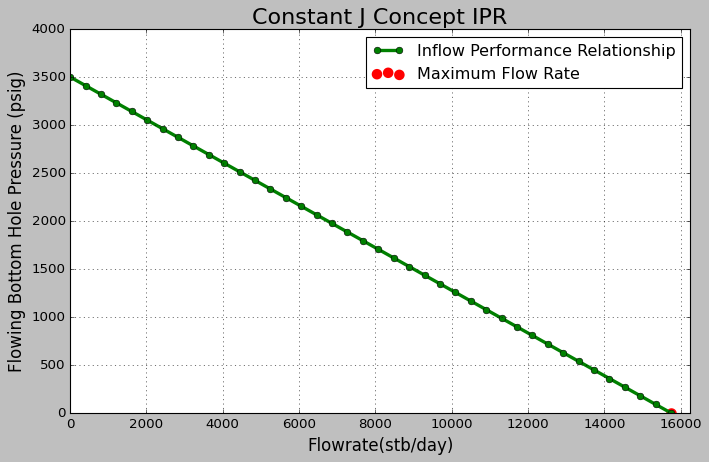

In [35]:

#Ploting IPR using Constant J concept
plt.figure(figsize=(10,6))
plt.style.use("classic")
plt.plot(q,p,marker="o",color="green",label="Inflow Performance Relationship",lw=3)
plt.scatter(q_max,0,label="Maximum Flow Rate",color="red",lw=5)
plt.title("Constant J Concept IPR",size=20)
plt.xlabel("Flowrate(stb/day)",size=15)
plt.ylabel("Flowing Bottom Hole Pressure (psig)",size=15)
plt.ylim(min(p),max(p)+500)
plt.xlim(min(q),max(q)+500)
plt.grid()
plt.legend()
plt.show()

#**Using Vogel Equation**#

Assumption

**Saturate Reservoir**

In [36]:
#Calculation of maximum flow rate (Q_max)
Q_max=Qi/(1-0.2*(Pwf/Pr)-.8*(Pwf/Pr)**2)
Q_max

10022.727272727274

In [37]:
#Calculation of flow rate at different flowing bottom hole pressure
Q_cal=[]
for i in p:
  Q=Q_max*(1-0.2*(i/Pr)-.8*(i/Pr)**2)
  Q_cal.append(Q)


In [38]:
#Conversion of data into dataframe
df=pd.DataFrame({"Pwf":p,
                 "Q":Q_cal})
df.head()

,Pwf,Q
0,3500.000000,0.000000
1,3410.256410,457.315761
2,3320.512821,904.088219
3,3230.769231,1340.317375
4,3141.025641,1766.003228


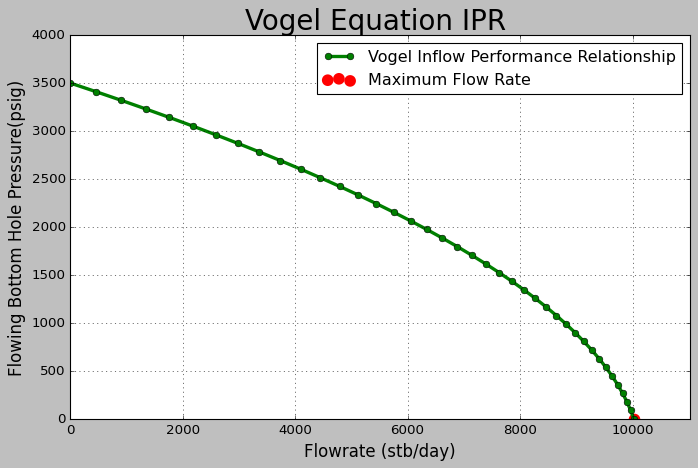

In [39]:
#Ploting IPR using Vogel's Equation
plt.figure(figsize=(10,6))
plt.style.use("classic")
plt.plot(Q_cal,p,linewidth=3,color="green",label="Vogel Inflow Performance Relationship",marker="o")
plt.scatter(Q_max,0,label="Maximum Flow Rate",color="red",marker="o",lw=6)
plt.title("Vogel Equation IPR ",size=25)
plt.xlabel("Flowrate (stb/day)",size=15)
plt.ylabel("Flowing Bottom Hole Pressure(psig)",size=15)
plt.xlim(0,max(Q_cal)+1000)
plt.ylim(0,4000)
plt.legend()
plt.grid()
plt.show()

#**Assuming Undersaturated Oil Reservoir**#
**Case:-1
Assuming that given flowrate pressure is above bubble point pressure**

In [40]:
#lets assume bubble point pressure is 2000 psig
Pb=2000 # psig

In [41]:
#Calculation of Productivity Index
J=(Qi/(Pr-Pwf))
#Calculation of flow rate at bubble point
Q_b=J*(Pr-Pb)
J,Q_b

(4.5, 6750.0)

In [42]:
#Calculation of flow rate at different pressure
q_cal=[]
for i in p:
#Case1:-Pressure above bubble point follow constant j concept
  if i>Pb:
    Q=J*(Pr-i)
    q_cal.append(Q)
#Case2:-Pressure above bubble point
  else:
    Q=Q_b+(J*Pb*(1-(0.2*i/Pb)-0.8*(i/Pb)**2)/1.8)
    q_cal.append(Q)
#Calculation of maximum flow rate when i=0
q_max=Q_b+(J*Pb*(1-(0.2*0/Pb)-0.8*(0/Pb)**2)/1.8)

In [43]:

#Creation of data Frame
df=pd.DataFrame({"Pwf":p,
                 "Q":q_cal})
df.head()

,Pwf,Q
0,3500.000000,0.000000
1,3410.256410,403.846154
2,3320.512821,807.692308
3,3230.769231,1211.538462
4,3141.025641,1615.384615


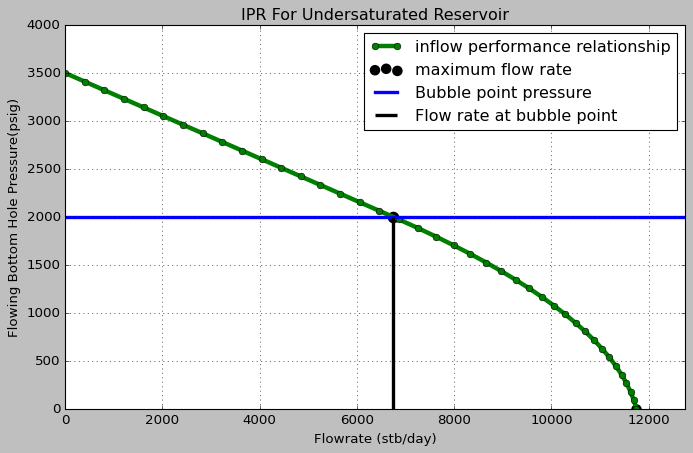

In [44]:

#Plotting of IPR For Undersaturate Reservoir
plt.figure(figsize=(10,6))
plt.style.use("classic")
plt.plot(q_cal,p,color="green",label="inflow performance relationship",lw=4,marker="o")
plt.scatter(q_max,0,label="maximum flow rate",color="black",lw=5)
plt.axhline(Pb,0,14000,label="Bubble point pressure",linewidth=3)
plt.vlines(x=Q_b, ymin=0, ymax=Pb, colors='black', label="Flow rate at bubble point",linewidth=3)
plt.scatter(Q_b,Pb,marker="o",lw=6)
plt.xlabel("Flowrate (stb/day)")
plt.ylabel("Flowing Bottom Hole Pressure(psig)")
plt.title("IPR For Undersaturated Reservoir")
plt.xlim(0,max(q_cal)+1000)
plt.ylim(0,4000)
plt.legend()
plt.grid()
plt.show()


**Case:-2
Assuming that given flowrate pressure is below bubble point pressure**

In [45]:
# Assumption bubble point pressure =3000psig
Qi=4500 #stb\day at 2500psig
P_b=3000 #psig
j=Qi/((Pr-P_b)+(P_b/1.8)*(1-0.2*(Pwf/P_b)-0.8*(Pwf/P_b)**2))
q_b=j*(Pr-P_b)
j,q_b

(4.673076923076925, 2336.5384615384623)

In [46]:
#calculation of flow rate at different flowing bottom hole pressure
q=[]
for i in p:
  if i>P_b:
    Q=j*(Pr-i)
    q.append(Q)
  else:
    Q=q_b+(j*P_b*(1-(0.2*i/P_b)-0.8*(i/P_b)**2)/1.8)
    q.append(Q)
q_max=q_b+j*(P_b/1.8)*(1-(0.2*0/P_b)-0.8*(0/P_b)**2)
q_max

10125.000000000004

In [47]:
#Generation data frame
df=pd.DataFrame({"Pwf":p,
                 "Q":q})
df.head()

,Pwf,Q
0,3500.000000,0.000000
1,3410.256410,419.378698
2,3320.512821,838.757396
3,3230.769231,1258.136095
4,3141.025641,1677.514793


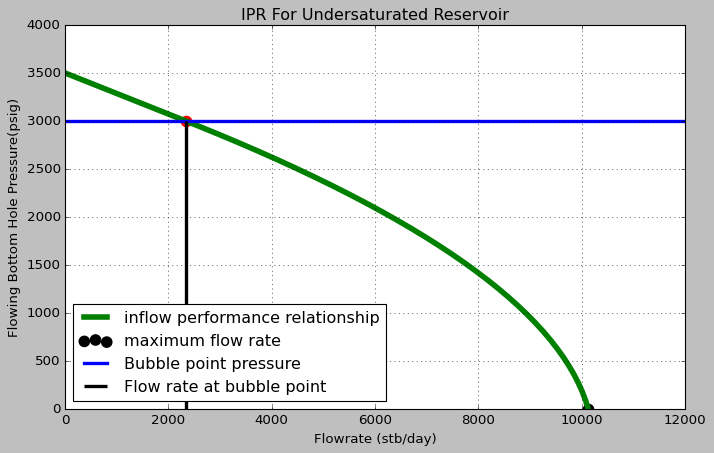

In [48]:
#Plotting of IPR For Undersaturate Reservoir
plt.style.use("classic")
plt.figure(figsize=(10,6))
plt.plot(q,p,color="green",label="inflow performance relationship",linewidth=5)
plt.scatter(q_max,0,label="maximum flow rate",color="black",marker="o",lw=6)
plt.axhline(P_b,0,14000,label="Bubble point pressure",linewidth=3)
plt.vlines(x=q_b, ymin=0, ymax=P_b, colors='black', label="Flow rate at bubble point",linewidth=3)
plt.scatter(q_b,P_b,marker="o",lw=6,color="red")
plt.xlabel("Flowrate (stb/day)")
plt.ylabel("Flowing Bottom Hole Pressure(psig)")
plt.title("IPR For Undersaturated Reservoir")
plt.xlim(0,12000)
plt.ylim(0,4000)
plt.legend(loc="best")
plt.grid()
plt.show()

#**Future IPR For Saturated Reservoir **#

**Standing Equation**


In [49]:
#Assumption of reservoir pressure is depleted to 3000 psig
Pr_f=3000 #psig
#Current zero drawdown productivity index
#Q_max from saturated reservoir case used above
J_p=1.8*Q_max/Pr
print("J_p",J_p)
#Since pvt is not mention , used pressure squared method
J_f=J_p*(Pr_f/Pr)**2
print("J_f",J_f)

J_p 5.154545454545455
J_f 3.787012987012987


In [50]:
#Generates 100 evenly spaced numbers from Depleted Reservoir Pressure(Pr) to 0
P=np.linspace(Pr_f,0,100)

In [51]:
#Calculation of flow rate
Q_max=J_f*Pr_f/1.8
Q_f=[]

for i in P:
  q=Q_max*(1-0.2*(i/Pr_f)-.8*(i/Pr_f)**2)
  Q_f.append(q)
Q_max

6311.688311688312

In [52]:
#Generates dataframe
df=pd.DataFrame({
    "Pwf":P,
    "Q":Q_f
})
df.head()

,Pwf,Q
0,3000.000000,0.000000
1,2969.696970,114.242782
2,2939.393939,227.455189
3,2909.090909,339.637222
4,2878.787879,450.788881


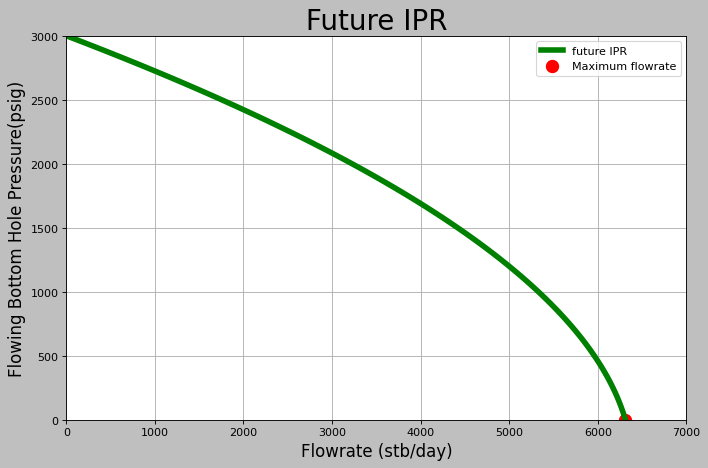

In [53]:
#Plotting of future IPR
plt.figure(figsize=(10,6))
plt.style.use("default")
plt.plot(Q_f,P,label="future IPR",lw=5,color="green")
plt.scatter(Q_max,0,label="Maximum flowrate",color="red",lw=6)
plt.title(" Future IPR ",size=25)
plt.xlabel("Flowrate (stb/day)",size=15)
plt.ylabel("Flowing Bottom Hole Pressure(psig)",size=15)
plt.xlim(0,7000)
plt.ylim(0,3000)
plt.legend()
plt.grid()
plt.show()

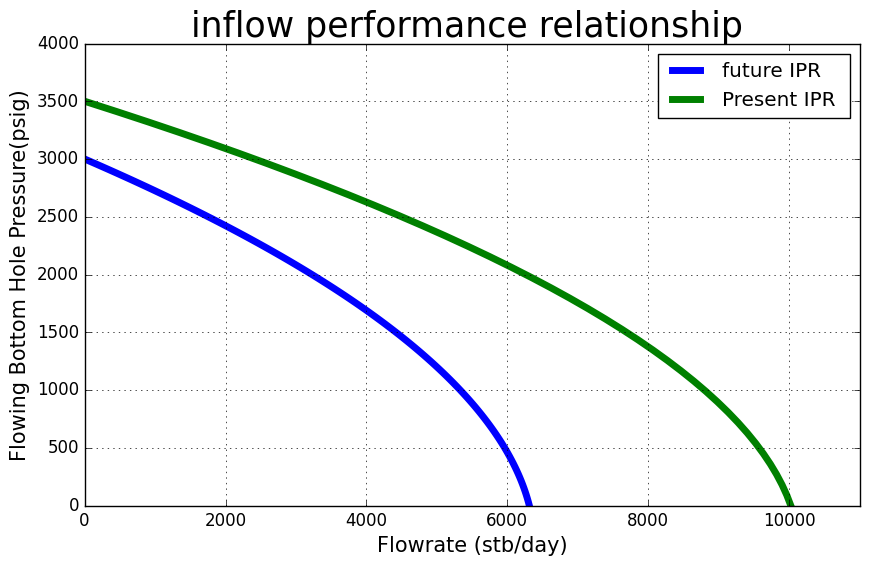

In [54]:
#Plotting of both Present and Future IPR
plt.figure(figsize=(10,6))
plt.style.use("classic")
plt.plot(Q_f,P,label="future IPR",lw=5)
plt.plot(Q_cal,p,linewidth=5,color="green",label="Present IPR ")
plt.title("inflow performance relationship ",size=25)
plt.xlabel("Flowrate (stb/day)",size=15)
plt.ylabel("Flowing Bottom Hole Pressure(psig)",size=15)
plt.xlim(0,11000)
plt.ylim(0,4000)
plt.legend()
plt.grid()
plt.show()